In [2]:
import pandas as pd


In [5]:
df = pd.read_csv("/content/Dataset_0.csv")

In [6]:
df.head()

,result_output,season_teams_count,position_class_team_1,position_class_team_2,diff_points_class,team_1_xg90_performance,team_2_xg90_performance,team_1_xga90_performance,team_2_xga90_performance,team_1_tsr_avg,...,odds_open_win1,odds_open_draw,odds_open_win2,odds_open_tm25,odds_open_tb25,odds_close_win1,odds_close_draw,odds_close_win2,odds_close_tm25,odds_close_tb25
0,1,28,A,G,F1,1.833563,1.161550,1.046711,1.457889,56.543316,...,1.312,6.50,8.60,3.15,1.386,1.296,6.48,8.86,3.49,1.321
1,2,28,H,E,D2,0.953167,1.198348,1.857064,1.522911,42.499000,...,2.010,3.93,3.61,2.22,1.714,2.480,3.62,2.87,2.11,1.781
2,X,28,D,D,B2,1.238412,1.513718,1.082048,1.359203,55.562040,...,1.751,4.24,4.47,2.29,1.675,1.934,3.96,3.84,2.31,1.666
3,X,28,H,C,E2,1.396592,1.342391,1.985973,1.023910,48.428135,...,2.600,3.64,2.72,2.37,1.636,2.770,3.58,2.58,2.20,1.724
4,1,28,E,E,A1,1.444847,1.322419,1.422922,1.547253,52.301826,...,1.735,4.59,4.24,2.61,1.523,1.606,4.62,5.20,3.01,1.414


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66008 entries, 0 to 66007
Data columns (total 47 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   result_output                   66008 non-null  object 
 1   season_teams_count              66008 non-null  int64  
 2   position_class_team_1           66008 non-null  object 
 3   position_class_team_2           66008 non-null  object 
 4   diff_points_class               66008 non-null  object 
 5   team_1_xg90_performance         66007 non-null  float64
 6   team_2_xg90_performance         66008 non-null  float64
 7   team_1_xga90_performance        66007 non-null  float64
 8   team_2_xga90_performance        66008 non-null  float64
 9   team_1_tsr_avg                  65966 non-null  float64
 10  team_2_tsr_avg                  65966 non-null  float64
 11  team1_all_classic_xgsh          65988 non-null  float64
 12  team1_all_classic_xgash         

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Load the data
df = pd.read_csv('/content/Dataset_0.csv')

# Drop missing values
df = df.dropna()

# Split the data into input features and target variable
X = df.iloc[:, :-10].drop('result_output', axis=1)
df['result_output'] = label_encoder.fit_transform(df['result_output'])
y = df['result_output']

# Scale the numerical features
num_features = ['season_teams_count', 'team_1_xg90_performance', 'team_2_xg90_performance',
                'team_1_xga90_performance', 'team_2_xga90_performance', 'team_1_tsr_avg', 'team_2_tsr_avg',
                'team1_all_classic_xgsh', 'team1_all_classic_xgash', 'team1_all_classic_gdxgd', 'team1_all_classic_wins',
                'team1_all_classic_draw', 'team1_all_classic_defeat', 'team1_all_xg90_draw_xgxga',
                'team1_all_xg90_zero_xgxga', 'team1_all_xg90_com_xgxga', 'team2_all_classic_xgd', 'team2_all_classic_gdxgd',
                'team2_all_classic_xp', 'team2_all_classic_minutes', 'team2_all_xg90_draw_xga90',
                'team2_all_xg90_draw_xgxga', 'team2_all_xg90_cxp_xg90', 'team2_all_xg90_cop_xg90', 'team2_all_five_draw_xg90',
                'team_1_points_difference4', 'team_2_points_difference4', 'team_1_xg90_performance_diff4',
                'team_2_xg90_performance_diff4', 'team_1_xga90_performance_diff4', 'team_2_xga90_performance_diff4',
                'team_1_lucky_l4', 'team_2_lucky_l4']

scaler = StandardScaler()
X[num_features] = scaler.fit_transform(X[num_features])

# One-hot encode the categorical features
cat_features = ['position_class_team_1', 'position_class_team_2', 'diff_points_class']

encoder = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(transformers=[('encoder', encoder, cat_features)], remainder='passthrough')
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import tensorflow as tf

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32)

model.save("anxaner_model.hf")

Epoch 1/30
1576/1576 [==============================] - 11s 4ms/step - loss: 1.0406 - accuracy: 0.4769
Epoch 2/30
1576/1576 [==============================] - 6s 4ms/step - loss: 1.0254 - accuracy: 0.4888
Epoch 3/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0222 - accuracy: 0.4903
Epoch 4/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0211 - accuracy: 0.4909
Epoch 5/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0190 - accuracy: 0.4926
Epoch 6/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0187 - accuracy: 0.4918
Epoch 7/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0177 - accuracy: 0.4919
Epoch 8/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0160 - accuracy: 0.4954
Epoch 9/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.0152 - accuracy: 0.4967
Epoch 10/30
1576/1576 [==============================] - 5s 3ms/step - loss: 1.01

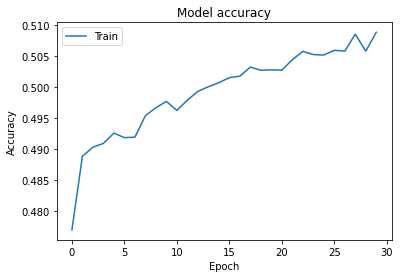

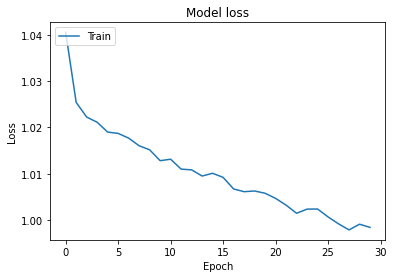

394/394 [==============================] - 1s 1ms/step


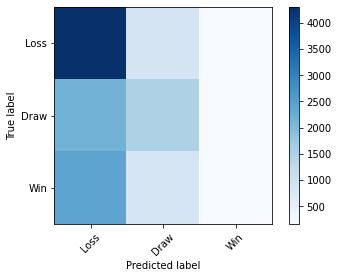

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot accuracy and loss curves
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

# Get predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, ['Loss', 'Draw', 'Win'], rotation=45)
plt.yticks(tick_marks, ['Loss', 'Draw', 'Win'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [19]:
print(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0     1    2    All
Actual                           
0          4302   899  174   5375
1          2148  1500  158   3806
2          2398   866  161   3425
All        8848  3265  493  12606


In [16]:
# # Load new data
# new_data = pd.read_csv('/content/dataset-test.csv')

# # Preprocess new data using the same preprocessor object used on the training data
# new_data[num_features] = scaler.transform(new_data[num_features])
# new_data = preprocessor.transform(new_data)

# Make predictions on new data
predictions = model.predict(X_test)

# Convert predictions to original labels
predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Handle unknown labels
predicted_labels[pd.isnull(predicted_labels)] = 'unknown'
predicted_labels = predicted_labels.astype(str)

# Replace 'unknown' with a specified value
# Replace 'X' with a specified value
predicted_labels[predicted_labels == 'X'] = '0'

# Convert the labels to integers
id_predicted_labels = predicted_labels.astype(int)

np.set_printoptions(threshold=np.inf)
print(id_predicted_labels)


394/394 [==============================] - 1s 3ms/step
[2 2 1 1 1 1 1 1 2 0 1 1 1 0 2 1 1 0 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 0 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 1
 1 2 1 1 1 1 1 2 1 2 1 1 2 1 0 2 1 1 1 1 1 2 1 2 0 1 1 1 1 1 1 1 1 1 2 1 0
 2 1 2 1 1 1 1 1 2 0 1 2 2 1 1 1 2 1 1 1 1 2 1 2 1 2 1 2 2 1 2 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 0 1 1 1 1 1 2 2 2 2 2 1 2
 0 1 1 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 2 1 0 1 1 2 1 1 1 2 2 1 1 2 2 1 1 1
 2 1 1 1 1 2 2 1 1 2 1 1 1 0 1 2 2 1 1 1 1 0 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1
 1 2 2 1 1 1 1 1 1 1 2 0 0 1 1 1 2 1 2 1 1 1 1 1 2 1 2 1 2 1 2 1 0 1 1 1 1
 2 2 1 1 0 1 2 1 2 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 2 1 1 1 2 1 1 1 1 1 1
 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 2 2 1 1 1 2 1 1 2 1 2 1 0
 1 2 2 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 1
 1 1 1 1 2 1 1 2 1 1 1 1 1 1 2 2 2 1 1 2 1 1 1 2 1 0 1 2 0 1 1 1 1 1 2 1 1
 1 1 2 1 1 1 1 1 1 1 1 2 2 1 2 1 2 1 1 2 1 1 

In [22]:
# Load new data
new_data = pd.read_csv('/content/dataset-test.csv')

# Replace double dots with single dots in numerical columns
num_features = ['season_teams_count', 'team_1_xg90_performance', 'team_2_xg90_performance',
                'team_1_xga90_performance', 'team_2_xga90_performance', 'team_1_tsr_avg', 'team_2_tsr_avg',
                'team1_all_classic_xgsh', 'team1_all_classic_xgash', 'team1_all_classic_gdxgd', 'team1_all_classic_wins',
                'team1_all_classic_draw', 'team1_all_classic_defeat', 'team1_all_xg90_draw_xgxga',
                'team1_all_xg90_zero_xgxga', 'team1_all_xg90_com_xgxga', 'team2_all_classic_xgd', 'team2_all_classic_gdxgd',
                'team2_all_classic_xp', 'team2_all_classic_minutes', 'team2_all_xg90_draw_xga90',
                'team2_all_xg90_draw_xgxga', 'team2_all_xg90_cxp_xg90', 'team2_all_xg90_cop_xg90', 'team2_all_five_draw_xg90',
                'team_1_points_difference4', 'team_2_points_difference4', 'team_1_xg90_performance_diff4',
                'team_2_xg90_performance_diff4', 'team_1_xga90_performance_diff4', 'team_2_xga90_performance_diff4',
                'team_1_lucky_l4', 'team_2_lucky_l4'] # replace with the names of numerical columns in your dataset
new_data[num_features] = new_data[num_features].replace('\.', '', regex=True)
new_data[num_features] = new_data[num_features].replace(',', '.', regex=True)

# Preprocess new data using the same preprocessor object used on the training data
new_data[num_features] = scaler.transform(new_data[num_features])
new_data = preprocessor.transform(new_data)

# Make predictions on new data
predictions = model.predict(new_data)

# Convert predictions to original labels
predicted_labels_encoded = np.argmax(predictions, axis=1)
predicted_labels = label_encoder.inverse_transform(predicted_labels_encoded)

# Handle unknown labels
predicted_labels[pd.isnull(predicted_labels)] = 'unknown'
predicted_labels = predicted_labels.astype(str)

# Replace 'unknown' with a specified value
# Replace 'X' with a specified value
predicted_labels[predicted_labels == 'X'] = '0'

# Convert the labels to integers
id_predicted_labels = predicted_labels.astype(int)

np.set_printoptions(threshold=np.inf)
print(id_predicted_labels)


13/13 [==============================] - 0s 2ms/step
[1 1 2 1 1 1 2 1 1 2 1 0 0 1 2 2 1 0 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 1 2 1
 2 0 0 2 1 1 2 0 1 0 1 1 2 2 0 2 2 1 2 1 1 0 2 1 1 1 2 2 1 2 2 0 1 1 0 1 1
 1 0 1 2 1 1 0 1 2 1 1 2 2 1 1 2 1 1 1 1 1 0 1 0 2 0 1 1 1 1 2 1 1 1 2 0 1
 0 1 1 2 2 1 1 1 1 0 1 2 1 0 2 1 1 2 1 2 1 0 2 2 2 2 1 1 1 1 1 1 1 1 2 1 0
 1 1 2 1 1 1 1 0 0 1 1 2 1 0 0 1 0 1 1 2 1 2 1 1 2 2 2 2 2 2 2 1 1 1 0 1 1
 2 2 1 2 1 1 1 1 0 1 1 2 1 1 2 1 0 2 1 2 2 1 1 2 0 1 1 1 1 2 1 1 1 2 1 1 0
 1 2 1 0 2 0 0 1 2 1 1 0 1 2 2 2 1 1 1 2 2 0 1 0 1 1 0 1 1 0 1 0 0 1 0 2 1
 2 1 2 0 1 2 1 1 1 0 2 1 2 1 2 1 0 2 0 1 1 1 2 1 2 1 1 1 1 0 2 2 1 1 1 2 2
 1 2 2 0 1 2 1 1 0 0 2 0 0 1 2 2 1 1 2 0 2 1 1 1 2 1 1 0 2 1 1 1 2 1 1 0 2
 2 1 2 1 2 1 1 2 1 1 1 2 1 2 1 2 2 1 0 2 1 0 2 2 1 2 1 2 1 1 1 2 1 2 0 2 0
 1 1 2 1 1 0 1 2 2 0 0 0 1 1 2 2 1 0 2 1 1 2 2 0 2 0 1 1 2]


In [25]:
# Concatenate new_data with id_predicted_labels
new_data = pd.read_csv('/content/dataset-test.csv')

id_predicted_labels_df = pd.DataFrame({'result_output': id_predicted_labels})
output_data = pd.concat([new_data, id_predicted_labels_df], axis=1)

# Save output_data to a csv file
output_data.to_csv('/content/output.csv', index=False)
